## Introduction

The following is my notebook for identifying credit card fraud. I will be using the IsolationForest model from sklearn with minimal pre-processing to see what a baseline performance can acheive with this dataset.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

We load the data into a single dataframe and quickly check the structure by doing `data.head()`. 

In [2]:
data = pd.read_csv('C:/Users/gauti/Desktop/UsupLearningFinal/data/creditcard.csv')

# Display basic information about the dataset
print("Dataset loaded successfully!")
print(f"Shape of the dataset: {data.shape}")
print(data.head())

Dataset loaded successfully!
Shape of the dataset: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0

## EDA

In the EDA step, I am looking for three main things, any missing values, the distribution between fraudulent and real transactions, and a basic correlation matrix between the features.

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Dataset Description:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500

C:\Users\gauti\AppData\Local\Temp\ipykernel_2428\2127993346.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


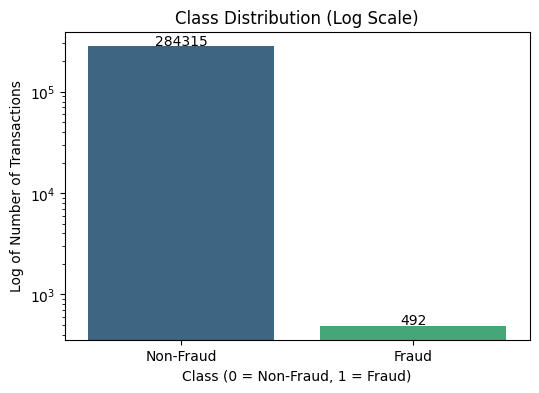

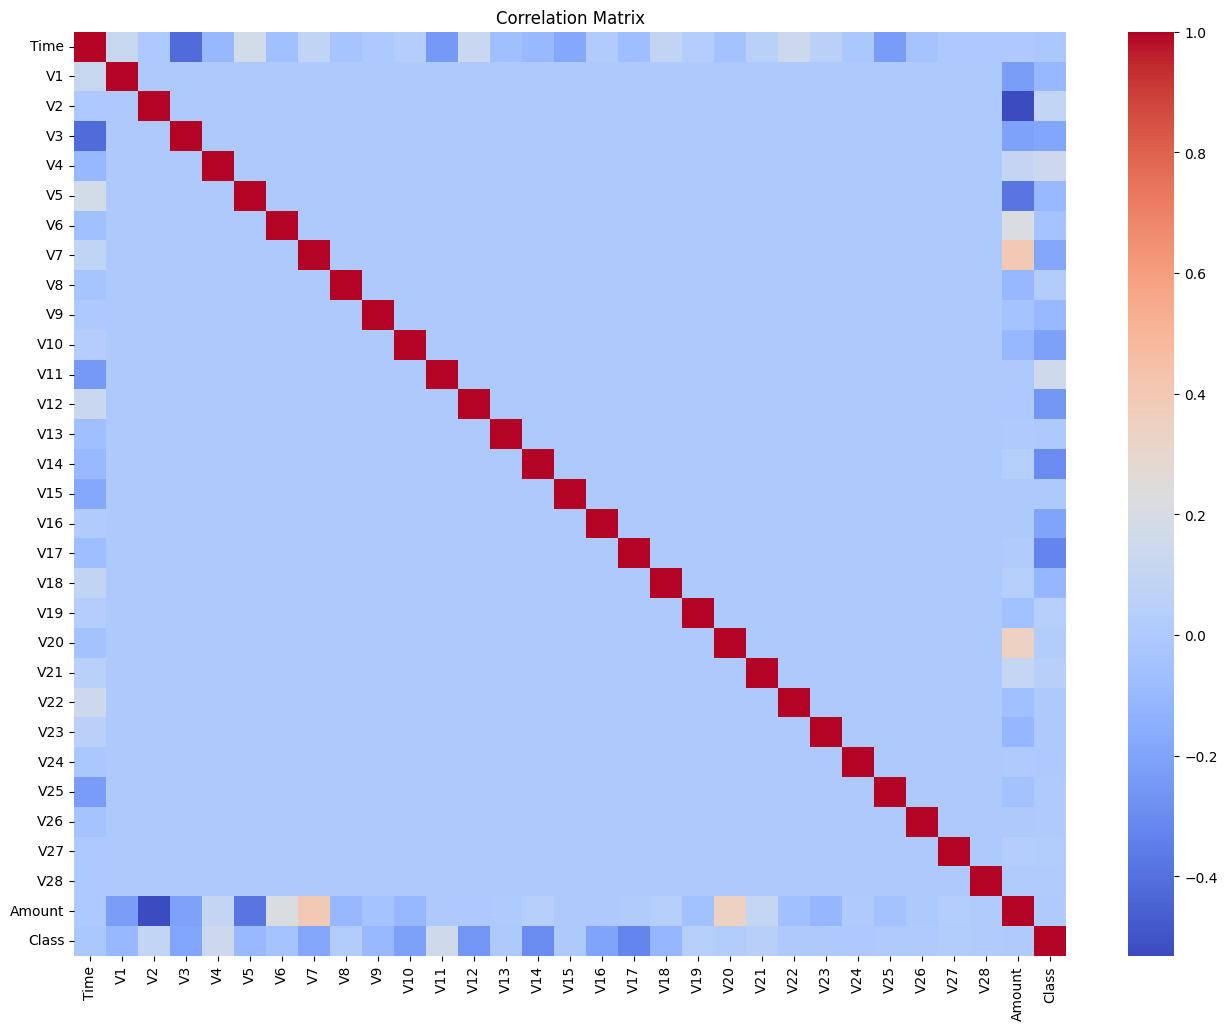

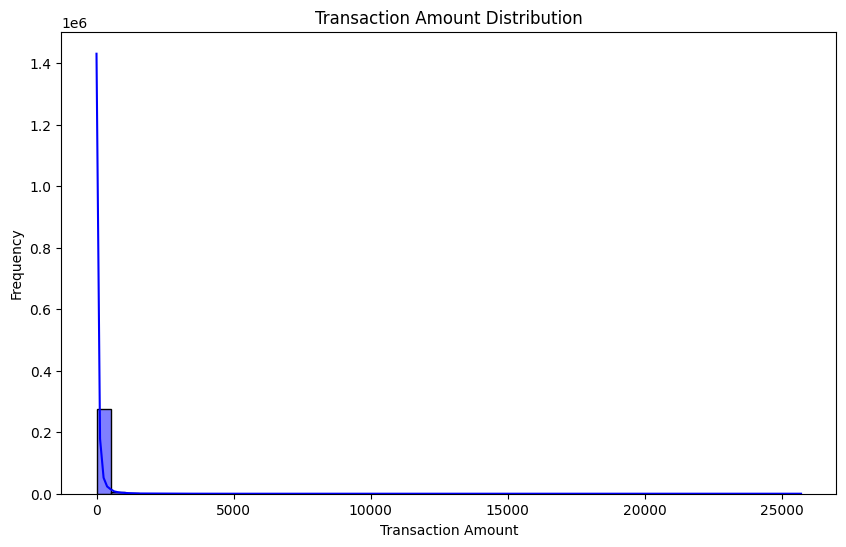

C:\Users\gauti\AppData\Local\Temp\ipykernel_2428\2127993346.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Amount", data=data, palette="Set2")


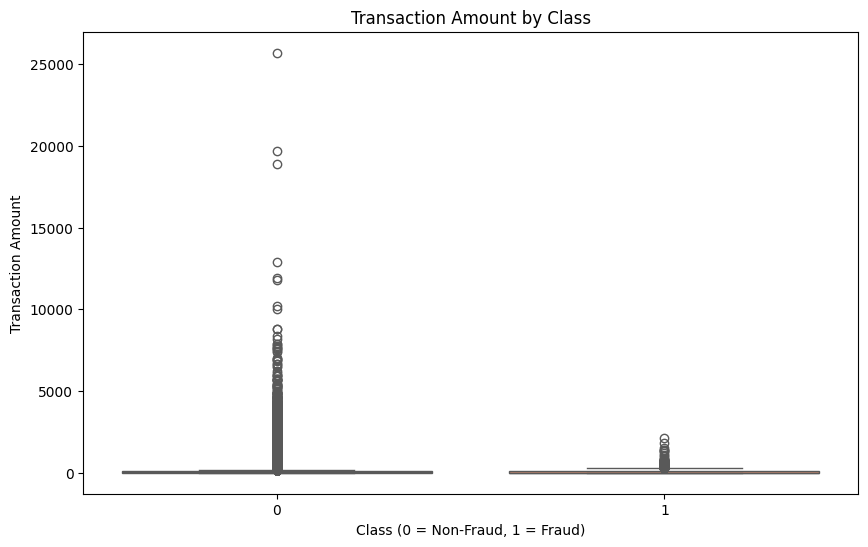

In [4]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Basic statistics about the dataset
print("\nDataset Description:")
print(data.describe())

# Class distribution
class_counts = data['Class'].value_counts()
print("\nClass Distribution:")
print(class_counts)

# Plot class distribution with logarithmic scale
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.yscale("log")  # Set y-axis to logarithmic scale
plt.title("Class Distribution (Log Scale)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Log of Number of Transactions")
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])

# Add exact count labels
for i, count in enumerate(class_counts.values):
    plt.text(x=i, y=count + 10, s=f"{count}", ha='center', fontsize=10)

plt.show()


# Correlation Matrix
plt.figure(figsize=(16, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

# Fraud vs. Non-Fraud: Amount comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x="Class", y="Amount", data=data, palette="Set2")
plt.title("Transaction Amount by Class")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()


We note that the data has no missing values, which most likely is due to the dataset coming from Kaggle desinged for learning, so the dataset is as clean as possible. In my opinion, the fraud to real transaction distribution seems to be a bit wide but that could also help with training a more accurate model since it will have to disconcern the differences given a small subset. Looking at the correlation matrix informs me that each column is mostly independent of each other which is good for anomaly detection in this case.

## Pre-processing

The code below is a very simple "pre-processing" technique, I simply use the sklearn scaler to scale the `Amount` column for better data recognition, I then drop all unnecessary columns and print the new column's output

In [ ]:
# 1. Scale the 'Amount' column
scaler = StandardScaler()
data['Amount_Scaled'] = scaler.fit_transform(data[['Amount']])

# 2. Drop the original 'Amount' column
data_preprocessed = data.drop(['Amount', 'Time'], axis=1)

# 3. Display a sample of the preprocessed dataset
print("Preprocessed Data Sample:")
print(data_preprocessed.head())


Preprocessed Data Sample:
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28 

## Training and Evaluation

For this job I will be using the sklearn IsolationForest model for anomaly detection, I then plot an evaluation of the model and it's respective output of the data, i.e the model produces a guess as how many frauds there are and I represented that guess as a graph.

Evaluation Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      0.18      0.22       492

    accuracy                           1.00    284807
   macro avg       0.65      0.59      0.61    284807
weighted avg       1.00      1.00      1.00    284807



C:\Users\gauti\AppData\Local\Temp\ipykernel_2428\3534656418.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly', data=data_preprocessed, palette='viridis')


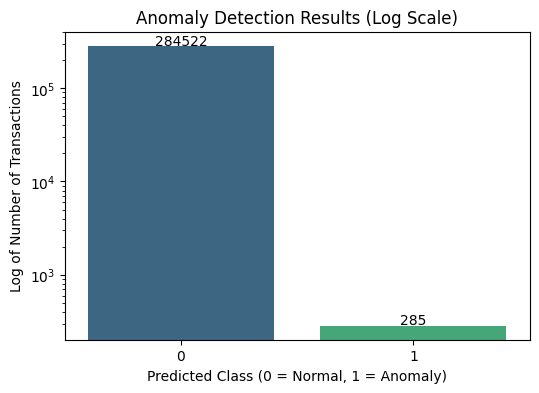

In [9]:
# 1. Initialize the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)

# 2. Fit the model (excluding the 'Class' column for unsupervised learning)
features = data_preprocessed.drop('Class', axis=1)
isolation_forest.fit(features)

# 3. Predict anomalies (-1 for anomaly, 1 for normal)
data_preprocessed['Anomaly'] = isolation_forest.predict(features)
data_preprocessed['Anomaly'] = data_preprocessed['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

# 4. Evaluate the results using the labeled 'Class' column
print("Evaluation Metrics:")
print(classification_report(data_preprocessed['Class'], data_preprocessed['Anomaly']))

# Visualize the results with logarithmic scale
plt.figure(figsize=(6, 4))
sns.countplot(x='Anomaly', data=data_preprocessed, palette='viridis')
plt.yscale("log")  # Set y-axis to logarithmic scale
plt.title("Anomaly Detection Results (Log Scale)")
plt.xlabel("Predicted Class (0 = Normal, 1 = Anomaly)")
plt.ylabel("Log of Number of Transactions")

# Add exact counts above the bars
anomaly_counts = data_preprocessed['Anomaly'].value_counts()
for i, count in enumerate(anomaly_counts.values):
    plt.text(x=i, y=count + 10, s=f"{count}", ha='center', fontsize=10)

plt.show()

## Discussion

From the evaluation metrics and the graph we can see the model is really good at predicting non-fraudulent values but is very poor at predicting fraudulent cases. Looking at the wieghted percentages, we note that the `0` class or real transactions have a f1-score of 1 (this is most likely due to the data being 99.8% real) and the `1` class had a f1-score of 0.22. This model is quite good but there is plenty of room fro improvement; the dataset I am using is very skewed to start but I also need to tune the hyperparameters more to get a more fine tuned model for this job. While I don't think there is much to do in the pre-processing step, I do think there is a way to gain results by adding weights to each class so the model has a better understanding of differenciating the values.

This project was interesting to code since there is no real `training` step but instead a model that is able to feature extract and find anomalies in. This type of work would pair really well with in depth modeling or supervised learning as more of a pre-processing step, since sometimes it is beneficial to feature extract before creating a complex model like a CNN or GANs. 